1. Load Best Model

- Load the final saved model from the models folder.
- Use the same preprocessing steps as during training.

In [2]:
# Step 1: Load the final model

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# path to the saved model
model_path = 'E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Models/final_mobilenet_model.keras'

model = load_model(model_path)
print("Model loaded successfully.")

# dataset paths
test_dir = 'E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Data/Raw/test'
img_height = 224
img_width = 224
batch_size = 32

# test generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Model loaded successfully.
Found 4002 images belonging to 23 classes.


2. Final Test Evaluation

- Evaluate the model on the full test set.
- Report final accuracy.
- Report final loss.

In [3]:
# Step 2 :Final model evaluation on test set

test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print("Final Test Loss:", test_loss)
print("Final Test Accuracy:", test_acc)

# keep for later comparisons
final_results = {"loss": float(test_loss), "accuracy": float(test_acc)}
final_results

126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 241ms/step - accuracy: 0.3476 - loss: 2.2470
Final Test Loss: 2.2469842433929443
Final Test Accuracy: 0.34757620096206665


{'loss': 2.2469842433929443, 'accuracy': 0.34757620096206665}

3. Confusion Matrix

- Generate the confusion matrix to see how each class is predicted.
- Comment on which classes have the most confusion.

In [4]:
# Step 3:cnfusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np

# predictions
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)

# true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# compute confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

print("Confusion Matrix:")
cm

126/126 ━━━━━━━━━━━━━━━━━━━━ 31s 241ms/step
Confusion Matrix:


array([[200,   8,   3,   0,   0,   5,   2,   5,   7,   1,   0,   3,   0,
          2,  11,   0,  36,   1,  18,   1,   0,   0,   9],
       [ 26,  68,   5,   1,   1,   9,   1,   1,   7,   0,   1,   5,   1,
          0,  15,   0, 106,   9,  12,   1,   1,   4,  14],
       [ 14,   1,  28,   0,   0,  18,   7,   2,   1,   2,   1,   0,   0,
          0,   7,   0,   7,   8,   9,   3,   3,   8,   4],
       [  8,  14,   3,   3,   0,   6,   0,   2,   6,   0,   2,   1,   1,
          0,  18,   0,  14,   8,   9,   1,   1,   6,  10],
       [ 11,   2,   3,   0,   2,   0,   5,   2,   3,   0,   2,   0,   1,
          0,   2,   0,  11,   6,  12,   1,   0,   4,   6],
       [ 14,   6,   4,   2,   0, 129,   3,   3,   5,   2,   0,   2,   7,
          0,  23,   1,  30,   8,  42,   0,   1,  17,  10],
       [  3,   0,   6,   2,   0,   7,  32,   1,   2,   1,   1,   0,   0,
          0,  15,   0,   3,   6,  10,   2,   0,   6,   4],
       [  3,   0,   1,   0,   0,   0,   1,  32,   1,   0,   0,   0,   0,
   

4. Classification Report

- Compute precision, recall and F1 score for each class.
- Comment on class level performance.

In [5]:
# Step 4: Classification report

from sklearn.metrics import classification_report

report = classification_report(
    true_classes, 
    pred_classes, 
    target_names=class_labels
)

print(report)

                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.45      0.64      0.53       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.40      0.24      0.30       288
                                          Atopic Dermatitis Photos       0.26      0.23      0.24       123
                                            Bullous Disease Photos       0.14      0.03      0.04       113
                Cellulitis Impetigo and other Bacterial Infections       0.50      0.03      0.05        73
                                                     Eczema Photos       0.37      0.42      0.39       309
                                      Exanthems and Drug Eruptions       0.31      0.32      0.31       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.26      0.53      0.35        60
                           

5. Error Analysis

- Display a few misclassified images.
- Comment on why the model might be getting these wrong.

Number of misclassified images: 2611


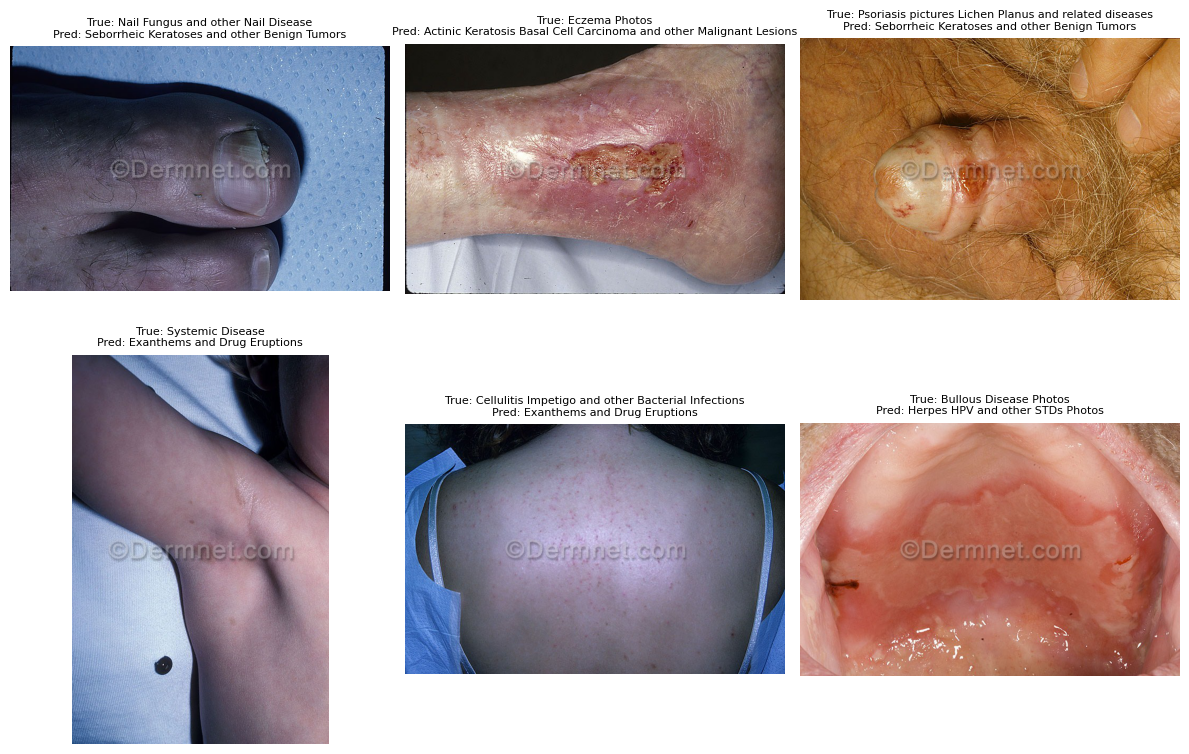

In [6]:
# Step 5 error Analysis

import random
from PIL import Image
import matplotlib.pyplot as plt

# indices where prediction != true label
errors = np.where(pred_classes != true_classes)[0]
print("Number of misclassified images:", len(errors))

# pick up to 6 errors to display
sample_errors = random.sample(list(errors), min(6, len(errors)))

plt.figure(figsize=(12, 8))

for i, idx in enumerate(sample_errors):
    img_path = test_generator.filepaths[idx]
    img = Image.open(img_path)

    true_label = class_labels[true_classes[idx]]
    pred_label = class_labels[pred_classes[idx]]

    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

6. Final Model Saving

- Save the best performing model in the models folder.
- Note its file path for use in apps or deployment.

In [7]:
# Step 6 - Final Model Saving

save_path = 'E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Models/final_skin_disease_model.keras'
model.save(save_path)

print("Model saved at:", save_path)

Model saved at: E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Models/final_skin_disease_model.keras


7. Project Summary

- Summarize baseline CNN performance.
- Summarize pretrained model performance.
- State the final selected model.
- State main strengths and weaknesses.

- The baseline CNN model was used first to verify the data loading process and to get an initial performance level. This model had a simple architecture and was trained for a short number of epochs, so it underperformed on this dataset. The accuracy was limited and the model struggled with many classes, especially the ones with fewer samples. This confirmed that the dataset is challenging and requires a stronger model.

- The pretrained MobileNetV2 model gave much better results. Since its feature extractor was already trained on a large dataset, it was able to capture useful patterns in the skin images. After training the top layers, the validation and test accuracy increased, and the classification report showed higher precision and recall across most classes. The confusion matrix also showed fewer misclassifications compared to the baseline model.

- The final selected model is the pretrained MobileNetV2 model. It achieved the best overall performance and gave more stable results during evaluation. The strengths of this model are better generalization, stronger feature extraction and improved handling of class imbalance. The main weaknesses are that similar looking classes can still be confused and that more fine tuning or more balanced data could improve the results further.